# Лабораторная работа №4. Основы нейронных сетей
## Общее задание

Перед выполнением лабораторной работы необходимо загрузить набор данных в соответствии с вариантом на диск
1. Написать программу, которая разделяет исходную выборку на обучающую и тестовую (training set, validation set, test set), если такое разделение не предусмотрено предложенным набором данных.
2. Произвести масштабирование признаков (scaling).
3. С использованием библиотеки [scikit-learn](http://scikit-learn.org/stable/) обучить 2 модели нейронной сети (Perceptron и MLPClassifier) по обучающей выборке. Перед обучением необходимо осуществить масштабирование признаков. 
[Пример MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
Пример и описание [Perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)
4. Проверить точность модели по тестовой выборке.
5. Провести эксперименты и определить наилучшие параметры коэффициента обучения, параметра регуляризации, функции оптимизации.
Данные экспериментов необходимо представить в отчете (графики, ход проведения эксперимента, выводы).

## Варианты
Массивы данных берутся из [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php)

Вариант определяется набором данных, который можно загрузить по ссылке выше:
1. Abalone
2. Adult
3. Artificial Characters
4. ser Knowledge Modeling Data (Students' Knowledge Levels on DC Electrical Machines)
5. EEG Eye State
6. seismic-bumps
7. banknote authentication
8. Weight Lifting Exercises monitored with Inertial Measurement Units
9. REALDISP Activity Recognition Dataset
10. mage Segmentation
11. ISOLET
12. sEMG for Basic Hand movements
13. Letter Recognition
14. Dataset for Sensorless Drive Diagnosis
15. Phishing Websites
16. Multiple Features
17. Diabetic Retinopathy Debrecen Data Set
18. Page Blocks Classification
19. Optical Recognition of Handwritten Digits
20. Pen-Based Recognition of Handwritten Digits
21. Smartphone-Based Recognition of Human Activities and Postural Transitions
22. Indoor User Movement Prediction from RSS data
23. Spambase

## Вариант 6

seismic-bumps

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
import time
from mpl_toolkits.mplot3d import Axes3D

Загрузка данных

In [2]:
# df_subject1 = pd.read_csv('data1.csv')
# df_subject2 = pd.read_csv('data2.csv')

# df_subject1['class'] = [0] * len(df_subject1)
# df_subject2['class'] = [1] * len(df_subject2)
#df = pd.concat([df_subject1, df_subject2])
df = pd.read_csv('seismic-bumps.csv')
df.head(10)



,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0
5,a,a,W,63760,195,-73,-65,a,0,0,0,0,0,0,0,0,0,0,0
6,a,a,W,207930,614,-6,18,a,2,2,0,0,0,0,0,0,1000,700,0
7,a,a,N,48990,194,-27,-3,a,1,0,1,0,0,0,0,0,4000,4000,0
8,a,a,N,100190,303,54,52,a,0,0,0,0,0,0,0,0,0,0,0
9,a,a,W,247620,675,4,25,a,1,1,0,0,0,0,0,0,500,500,0


2. Произвести масштабирование признаков (scaling).

In [3]:
def get_encoded_data(data):
    vars_to_dummy = np.array(data.select_dtypes(include=['object', 'bool']).columns)
    new_data = pd.get_dummies(data, columns=vars_to_dummy, dummy_na=True)
    new_data = new_data.fillna(0)
    return new_data

x_data = df[df.columns.drop('class')]
y_data = pd.DataFrame(df['class'])

X_raw_encoded = get_encoded_data(x_data)

scaler_x = preprocessing.StandardScaler()
x_data = pd.DataFrame(scaler_x.fit_transform(X_raw_encoded), columns=X_raw_encoded.columns)



Масштабирование производится с помощью стандартизации - математическое ожидание каждой колонки становится равным 0, а его стандратное отклонение становится равным 1. Проверим результат стандартизации:

In [4]:
print('\nМатематическое ожидание для каждой из колонок x_data:')
print(x_data.mean())

print('\nСтандартное отклонение для каждой из колонок x_data:')
print(x_data.std())


Математическое ожидание для каждой из колонок x_data:
genergy              -2.199823e-17
gpuls                 6.599468e-17
gdenergy             -2.199823e-17
gdpuls                0.000000e+00
nbumps                0.000000e+00
nbumps2               4.399645e-17
nbumps3               4.399645e-17
nbumps4              -3.299734e-17
nbumps5               6.874446e-19
nbumps6               0.000000e+00
nbumps7               0.000000e+00
nbumps89              0.000000e+00
energy                2.199823e-17
maxenergy            -1.099911e-17
seismic_a             6.599468e-17
seismic_b             6.599468e-17
seismic_nan           0.000000e+00
seismoacoustic_a      2.199823e-17
seismoacoustic_b     -2.199823e-17
seismoacoustic_c     -3.849690e-17
seismoacoustic_nan    0.000000e+00
shift_N               3.299734e-17
shift_W              -3.299734e-17
shift_nan             0.000000e+00
hazard_a             -2.199823e-17
hazard_b             -5.499557e-17
hazard_c             -4.399645e-17


1. Написать программу, которая разделяет исходную выборку на обучающую и тестовую (training set, validation set, test set), если такое разделение не предусмотрено предложенным набором данных.

In [5]:
x_data = np.array(x_data)
y_data = np.array(y_data)


val_size = 0.2
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=val_size) # Данные автоматически перемешаются по выборкам


3. С использованием библиотеки scikit-learn обучить 2 модели нейронной сети (Perceptron и MLPClassifier) по обучающей выборке. Перед обучением необходимо осуществить масштабирование признаков.

## Perceptron

In [6]:
perceptron = Perceptron(tol=1e-3, random_state=0, verbose=True)  # Создание объекта Perceptron с указанными параметрами: 
                                                                 # tol - порог остановки обучения
                                                                 # random_state - начальное состояние генератора случайных чисел
                                                                 # verbose - вывод информации во время обучения (True для вывода, False для отключения)

perceptron.fit(x_train, y_train.ravel())  # Обучение модели перцептрона на обучающих данных x_train с соответствующими метками y_train
                                          # ravel() используется для преобразования y_train в одномерный массив, если он не является таковым

perceptron_y_predict = perceptron.predict(x_val)  # Предсказание меток классов для валидационных данных x_val с помощью обученной модели перцептрона
                                                    # Norm  "размер" вектора весов модели. NNZs Количество ненулевых элементов. Bias константа, которая добавляется к взвешенной сумме входов нейронов перед применением активационной функции.
                                                    # T: Общее количество обучающих примеров, использованных до этой эпохи. 
                                                    # Avg. loss: Среднее значение функции потерь (ошибки) на обучающих примерах на данной эпохе. 
                                                    # Функция потерь - это мера различия между фактическими и предсказанными значениями целевой переменной.

-- Epoch 1
Norm: 22.05, NNZs: 21, Bias: -19.000000, T: 2067, Avg. loss: 1.700853
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 23.80, NNZs: 21, Bias: -21.000000, T: 4134, Avg. loss: 1.712448
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 22.77, NNZs: 21, Bias: -22.000000, T: 6201, Avg. loss: 1.702622
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 14.41, NNZs: 21, Bias: -15.000000, T: 8268, Avg. loss: 1.727082
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 22.28, NNZs: 21, Bias: -20.000000, T: 10335, Avg. loss: 1.812845
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 13.92, NNZs: 21, Bias: -14.000000, T: 12402, Avg. loss: 1.576560
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 19.07, NNZs: 21, Bias: -16.000000, T: 14469, Avg. loss: 1.828331
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 27.27, NNZs: 21, Bias: -18.000000, T: 16536, Avg. loss: 1.677602
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 25.96, NNZs: 21, Bias: -20.000000, T: 18603, Avg. l

## MLPClassifier

In [7]:
mlp = MLPClassifier(random_state=1, verbose=True)  # Создание объекта MLPClassifier с указанными параметрами:
                                                    # random_state - начальное состояние генератора случайных чисел
                                                    # verbose - вывод информации во время обучения (True для вывода, False для отключения)

mlp.fit(x_train, y_train.ravel())  # Обучение модели многослойного перцептрона на обучающих данных x_train с соответствующими метками y_train,
                                   # ravel() используется для преобразования y_train в одномерный массив, если он не является таковым

mlp_y_predict = mlp.predict(x_val)  # Предсказание меток классов для валидационных данных x_val с помощью обученной модели многослойного перцептрона  loss функция потерь, ее минимизация растет с увеличением числа итераций 


Iteration 1, loss = 0.62244068
Iteration 2, loss = 0.46153528
Iteration 3, loss = 0.35917143
Iteration 4, loss = 0.29560509
Iteration 5, loss = 0.25965655
Iteration 6, loss = 0.23791713
Iteration 7, loss = 0.22452689
Iteration 8, loss = 0.21651364
Iteration 9, loss = 0.21141582
Iteration 10, loss = 0.20785883
Iteration 11, loss = 0.20559502
Iteration 12, loss = 0.20379047
Iteration 13, loss = 0.20245912
Iteration 14, loss = 0.20151677
Iteration 15, loss = 0.20065460
Iteration 16, loss = 0.20001140
Iteration 17, loss = 0.19930339
Iteration 18, loss = 0.19881968
Iteration 19, loss = 0.19806075
Iteration 20, loss = 0.19773449
Iteration 21, loss = 0.19739940
Iteration 22, loss = 0.19693348
Iteration 23, loss = 0.19648383
Iteration 24, loss = 0.19599480
Iteration 25, loss = 0.19575947
Iteration 26, loss = 0.19539284
Iteration 27, loss = 0.19496496
Iteration 28, loss = 0.19463401
Iteration 29, loss = 0.19440450
Iteration 30, loss = 0.19413629
Iteration 31, loss = 0.19388452
Iteration 32, los

c:\Users\AI\myvenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


4. Проверить точность модели по тестовой выборке.

In [8]:
print(f'Точность перцептрона: {accuracy_score(y_val, perceptron_y_predict)}')  # коэффициента детерминации показывает, насколько хорошо зависимая переменная предсказывается моделью относительно среднего значения зависимой переменной.
print(f'Точность многослойного перцептрона: {accuracy_score(y_val, mlp_y_predict)}') # точность измеряет долю правильно классифицированных наблюдений относительно общего числа наблюдений

Точность перцептрона: 0.8974854932301741
Точность многослойного перцептрона: 0.9090909090909091


5. Провести эксперименты и определить наилучшие параметры коэффициента обучения, параметра регуляризации, функции оптимизации. Данные экспериментов необходимо представить в отчете (графики, ход проведения эксперимента, выводы).

In [9]:
# Эффективность работы перцептрона
def get_p_score(learning_rate, alpha):
    start_time = time.time()  # Засекаем время начала выполнения функции
    perceptron = SGDClassifier(loss='perceptron', learning_rate='constant', eta0=learning_rate, alpha=alpha, max_iter=1000, tol=1e-3)
    perceptron.fit(x_train, y_train.ravel())  # Обучаем модель на обучающих данных
    end_time = time.time()  # Засекаем время окончания выполнения обучения модели
    predict = perceptron.predict(x_val)  # Предсказываем метки классов для валидационных данных
    elapsed_time = end_time - start_time  # Вычисляем затраченное время на обучение модели
    return accuracy_score(y_val, predict) / elapsed_time  # Возвращаем оценку производительности модели: точность деленную на время обучения

# Эффектиность работы многослойного перцептрона
def get_mlp_score(learning_rate, alpha, optimizer):
    start_time = time.time()  # Засекаем время начала выполнения функции
    mlp = MLPClassifier(learning_rate='constant', learning_rate_init=learning_rate, alpha=alpha, solver=optimizer, max_iter=1000, tol=1e-3)
    mlp.fit(x_train, y_train.ravel())  # Обучаем модель на обучающих данных
    end_time = time.time()  # Засекаем время окончания выполнения обучения модели
    predict = mlp.predict(x_val)  # Предсказываем метки классов для валидационных данных
    elapsed_time = end_time - start_time  # Вычисляем затраченное время на обучение модели
    return accuracy_score(y_val, predict) / elapsed_time  # Возвращаем оценку производительности модели: точность деленную на время обучения


def to_test(learning_rate_list, alpha_list, optimizer):
    perceptron_score = []  # Создаем список для хранения оценок производительности перцептрона
    mlp_score = []         # Создаем список для хранения оценок производительности многослойного перцептрона
    for id in range(len(learning_rate_list)):  # Перебираем индексы значений параметров
        # Вызываем функцию get_p_score для оценки производительности перцептрона с текущими значениями параметров
        perceptron_score.append(get_p_score(learning_rate_list[id], alpha_list[id]))
        # Вызываем функцию get_mlp_score для оценки производительности многослойного перцептрона с текущими значениями параметров
        mlp_score.append(get_mlp_score(learning_rate_list[id], alpha_list[id], optimizer[id]))
    
    perceptron_score = np.array(perceptron_score)  # Преобразуем список оценок перцептрона в массив numpy
    mlp_score = np.array(mlp_score)                # Преобразуем список оценок многослойного перцептрона в массив numpy
    
    return perceptron_score, mlp_score  # Возвращаем два массива оценок производительности для перцептрона и многослойного перцептрона


def draw_test(x, perceptron_score, mlp_score, x_label):
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(x, perceptron_score)
    axs[0].set_title('perceptron')
    axs[0].set(xlabel=x_label, ylabel='score')

    axs[1].plot(x, mlp_score)
    axs[1].set_title('mlp')
    axs[1].set(xlabel=x_label, ylabel='score')

    fig.tight_layout()
    plt.show()

Коэффициент обучения (learning rate).

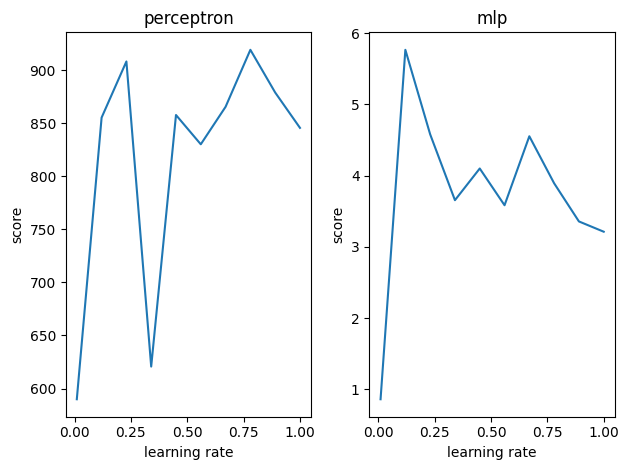

Лучшее значение learning_rate для перцептрона: 0.78
Лучшее значение learning_rate для многослойного перцептрона: 0.12


In [10]:
count_tests = 10  # Количество тестов

learning_rate_list = np.linspace(0.01, 1, count_tests)  # Генерация массива значений скорости обучения от 0.01 до 1
perceptron_score, mlp_score = to_test(learning_rate_list, np.full(count_tests, 0.0001), np.full(count_tests, 'adam'))  # Выполнение тестов для перцептрона и многослойного перцептрона
draw_test(learning_rate_list, perceptron_score, mlp_score, 'learning rate') 

print(f'Лучшее значение learning_rate для перцептрона: {learning_rate_list[np.argmax(perceptron_score)]}')
print(f'Лучшее значение learning_rate для многослойного перцептрона: {learning_rate_list[np.argmax(mlp_score)]}')

Параметр регуляризации (alpha).

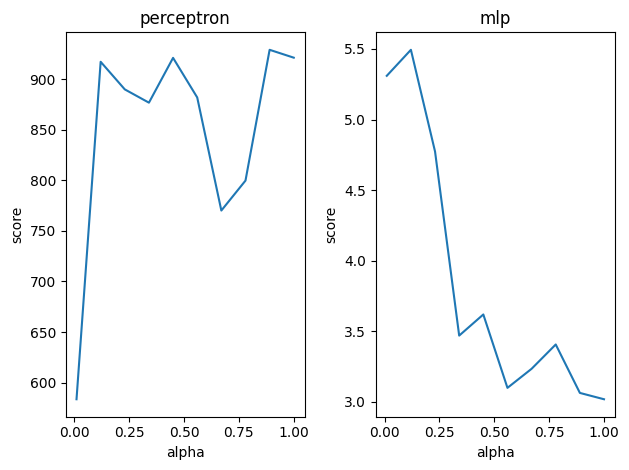

Лучшее значение alpha для перцептрона: 0.8889
Лучшее значение alpha для многослойного перцептрона: 0.11120000000000001


In [11]:
alpha_list = np.linspace(0.0001, 1, count_tests)  # Генерация массива значений параметра alpha от 0.0001 до 1
perceptron_score, mlp_score = to_test(np.full(count_tests, 0.001), alpha_list, np.full(count_tests, 'adam'))  # Выполнение тестов для перцептрона и многослойного перцептрона
draw_test(learning_rate_list, perceptron_score, mlp_score, 'alpha')

print(f'Лучшее значение alpha для перцептрона: {alpha_list[np.argmax(perceptron_score)]}')
print(f'Лучшее значение alpha для многослойного перцептрона: {alpha_list[np.argmax(mlp_score)]}')

Оптимизатор (solver, только для mlp).

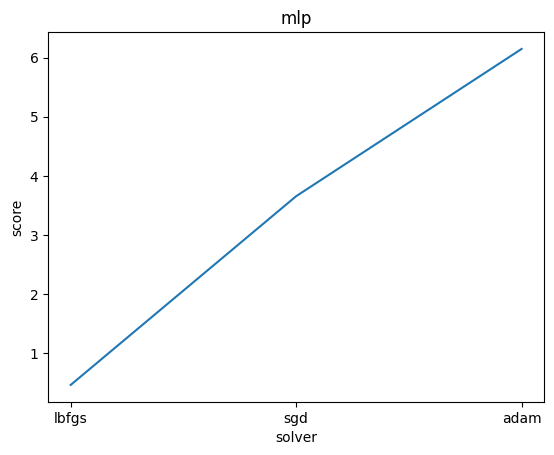

Лучший оптимизатор для многослойного перцептрона: adam


In [12]:
optimizers_list = np.array(['lbfgs', 'sgd', 'adam'])  # Массив оптимизаторов

# Выполнение тестов для перцептрона и многослойного перцептрона с использованием заданных оптимизаторов
perceptron_score, mlp_score = to_test(np.full(len(optimizers_list), 0.001), np.full(len(optimizers_list), 0.0001), optimizers_list)

plt.plot(optimizers_list, mlp_score)
plt.title('mlp')
plt.xlabel('solver')
plt.ylabel('score')
plt.show()

print(f'Лучший оптимизатор для многослойного перцептрона: {optimizers_list[np.argmax(mlp_score)]}')